### More on determinants

The determinant is often not computed (although we discuss its computation below) but it gives a theoretical condition for the invertiblity of matrices<br>

#### Theorem

The following are equivalent for an $n\times n$ matrix $A$:

1. The equation $Ax = 0$ has the unique solution $x = 0$.
2. The system $Ax = b$ has a unique solution for any $n$-dimensional column vector $b$.
3. The matrix $A$ is nonsingular; $A^{-1}$ exists.
4. $\det A \neq 0$
5. Gaussian elimination with row interchanges can be performed on the system $Ax = b$ for any $n$-dimensional vector $b$.

#### A pitfall for the determinant

Consider the $100 \times 100$ matrix

$$A = \begin{bmatrix} \lambda \\ & \lambda \\ && \lambda \\ &&& \lambda\\ &&&&\ddots \\ &&&&& \lambda \end{bmatrix}.$$

Assume $\lambda = 10^{-1}$, then $\det A = 10^{-100}$.  If we computed this, we might assume that $A$ is not invertible!  But for $Ax =b = [1,1,1,1,1,\ldots,1]^T$ we have $x = [10,10,10,\ldots,10]^T$, a perfectly fine solution!

This is a reason that determinants are typically not used numerically (determinants of "small"-dimensional matrices can be OK, but what is "small"?)

### Operation count for cofactor expansion

Recall that we defined the determinant via

$$\det A = \sum_{j=1}^n a_{ij} A_{ij}$$

where $A_{ij}$ is itself a determinant of an $(n-1) \times (n-1)$ matrix.

Let $S_n$ and $P_n$ denote the number of sums and products, respectively, that are required to compute a determinant of size $n$.  In this, we have $n$ multiplications, $n-1$ sums, and we have to 



$$\det A = \sum_{j=1}^n a_{ij} A_{ij}$$

For sums:  In this, $n-1$ sums, and we have to do $S_{n-1}$, $n$ times.

$$S_n = n S_{n-1} + n-1$$

And we have that $S_1 = 0$:

$S_2 = 2(0) + 1 = 1$

$S_3 = 3 S_2 + 2 = 5$

$S_4 = 4 S_3 + 3 = 23$



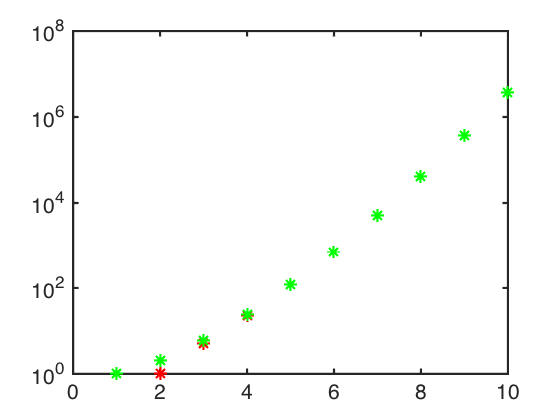

In [12]:
n = 1:10;
S = zeros(10,1);
for i = 2:10
    S(i) = i*S(i-1) + i -1;
end

semilogy(n,S,'r*')
hold on
semilogy(n,factorial(n),'g*')

From this plot you can see that it appears $S_n \approx n!$.  Indeed, one can show that 

$$\lim_{n\to \infty} S_n/n! = 1,$$
$$\lim_{n \to \infty} P_n/n! = e.$$

To show this, we have $S_n = n S_{n-1} + n-1$.  For the factorial $n! = n(n-1)!$, so define $\Delta_n = S_n/n!$ which satisfies

$$ \frac{S_n}{n!} = \frac{n S_{n-1}}{n (n-1)!} + \frac{n-1}{n!}$$
$$ \Delta_n = \Delta_{n-1} + \frac{n-1}{n!}$$

We have $\Delta_1 = 0$ because $S_1 = 0$.

It then follows that as $k \to \infty$

$$\Delta_k = \sum_{n=1}^k \frac{n-1}{n!} \to \sum_{n=1}^\infty \frac{n-1}{n!}$$

$$\sum_{n=1}^\infty \frac{n-1}{n!} = \sum_{n=1}^\infty \frac{1}{(n-1)!} - \sum_{n=1}^\infty \frac{1}{n!} \\
= e - (e-1) = 1.$$

For the product $\Delta_n = P_n/n!$  satisfies

$$ \frac{S_n}{n!} = \frac{n S_{n-1}}{n (n-1)!} + \frac{n}{n!}$$
$$ \Delta_n = \Delta_{n-1} + \frac{1}{(n-1)!}$$

We have $\Delta_1 = 1$ because $P_1 = 1$.

It then follows that as $k \to \infty$

$$\Delta_k = \sum_{n=1}^k \frac{1}{(n-1)!} \to \sum_{n=1}^\infty \frac{1}{(n-1)!} = e$$

So, using the cofactor expansion it takes more than $n!$ operations to compute an $n\times n$ determinant.  We use __Stirling's approximation__

$$n! \approx \sqrt{2\pi n} \left( \frac{n}{e} \right)^n$$.

This is exponential growth!  How can we ever compute a determinant (even if it is a bad idea...)?

If you go back to our previous calculations for Gaussian elimination (without backward substitution) applied to an $n\times n$ matrix it takes

$$\frac{2n^3-3n^2+n}{6} \quad \text{additions}$$

and 

$$\frac{n^3-n}{3} \quad \text{multiplications}$$

to use row operations to transform a matrix to upper-triangular form.  Then, once the matrix is in upper-triangular form $U$,

$$\det A = (-1)^{\text{ (# of row flips) }}\prod_{i=1}^n u_{ii}$$.

This gives a total count to compute the determinant as

$$\frac{2n^3-3n^2+n}{6} \quad \text{additions}$$

and 

$$\frac{n^3+2n-2}{3} \quad \text{multiplications}$$

This is MUCH better than $n!$ operations.  Let's tabulate a few values

In [1]:
n = 1:6;  %counting additions
cofactor = zeros(1,length(n));
for i = 2:length(n)
    cofactor(i) = i*cofactor(i-1) + i-1;
end
Gauss = (2*n.^3 - 3*n.^2 +n)/6;
[cofactor',Gauss']

ans =

     0     0
     1     1
     5     5
    23    14
   119    30
   719    55
